## Regression Week 4: Ridge Regression Assignment 1

In [71]:
import pandas as pd
import numpy as np

In [72]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

sales = pd.read_csv('kc_house_data.csv/kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort(['sqft_living','price'])

C:\Anaconda2\envs\gl-env\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


### Defining the polynomial function in pandas data frame

In [73]:
def polynomial_frame(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_frame= pd.DataFrame(feature,columns=['power_1'])
    poly_frame['power_1']= feature
    #poly_frame = pd.DataFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    #poly_frame['power_1']= feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_frame[name]= feature**power
    return poly_frame

In [74]:
tmp = np.array([1., 2., 3.])
tmp_cubed = tmp**3
print tmp
ex_frame = pd.DataFrame(tmp,columns=['power_1'])
print ex_frame

[ 1.  2.  3.]
   power_1
0      1.0
1      2.0
2      3.0


In [75]:
print polynomial_frame(tmp, 3)

   power_1  power_2  power_3
0      1.0      1.0      1.0
1      2.0      4.0      8.0
2      3.0      9.0     27.0


In [76]:
poly15_data = polynomial_frame(sales['sqft_living'], 15)

with pd.option_context('mode.use_inf_as_null', True):
    is_bad_data = poly15_data.isnull().sum()

    
print is_bad_data

#with pd.option_context('mode.use_inf_as_null', True):
    #is_bad_data = poly15_data.isnull()
    



power_1     0
power_2     0
power_3     0
power_4     0
power_5     0
power_6     0
power_7     0
power_8     0
power_9     0
power_10    0
power_11    0
power_12    0
power_13    0
power_14    0
power_15    0
dtype: int64


### Using Scikit learn for L2 Ridge Regression

In [77]:
#introduce a tiny amount of regularization (l2_penalty=1.5e-5)
l2_small_penalty = 1.5e-5

In [78]:
from sklearn import linear_model
model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(poly15_data, sales['price'])
print model.coef_
print(list(zip(poly15_data.columns, model.coef_)))

coef_dict = {}
for coef, feat in zip(model.coef_,poly15_data.columns):
    coef_dict[feat] = coef

[  1.24873306e+02  -4.77376011e-02   3.01446238e-05  -2.44419942e-09
  -1.94153675e-13   8.54085686e-18   1.51142121e-21   8.27979094e-26
   6.52603100e-31  -3.27895017e-34  -3.87962315e-38  -2.72437650e-42
  -1.07790800e-46   3.78242694e-51   1.39790296e-54]
[('power_1', 124.87330648139755), ('power_2', -0.047737601081575487), ('power_3', 3.0144623808091498e-05), ('power_4', -2.4441994169003605e-09), ('power_5', -1.9415367543933111e-13), ('power_6', 8.5408568552372492e-18), ('power_7', 1.5114212102207109e-21), ('power_8', 8.2797909354435411e-26), ('power_9', 6.5260310031554409e-31), ('power_10', -3.2789501683271688e-34), ('power_11', -3.8796231461580157e-38), ('power_12', -2.7243764976977608e-42), ('power_13', -1.0779079984187509e-46), ('power_14', 3.7824269373134095e-51), ('power_15', 1.3979029645014274e-54)]


In [79]:
# dtype_dict same as above
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv/wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv/wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv/wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv/wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

In [80]:
poly15_set1 = polynomial_frame(set_1['sqft_living'], 15)
poly15_set2 = polynomial_frame(set_2['sqft_living'], 15)
poly15_set3 = polynomial_frame(set_3['sqft_living'], 15)
poly15_set4 = polynomial_frame(set_4['sqft_living'], 15)

### Set1

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

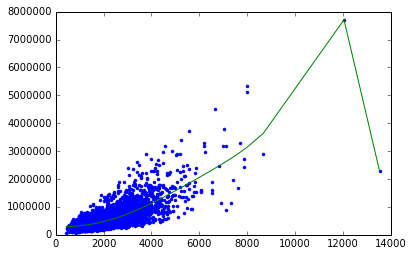

In [82]:
model1 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model1.fit(poly15_set1, set_1['price'])

plt.plot(poly15_set1['power_1'],set_1['price'],'.',
        poly15_set1['power_1'], model1.predict(poly15_set1),'-')

### Set2

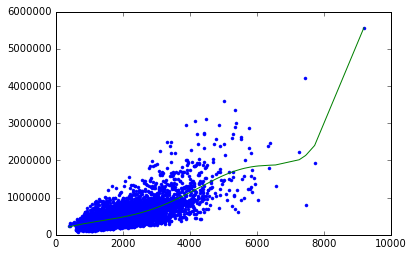

In [83]:
model2 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model2.fit(poly15_set2, set_2['price'])

plt.plot(poly15_set2['power_1'],set_2['price'],'.',
        poly15_set2['power_1'], model2.predict(poly15_set2),'-')

## Set3

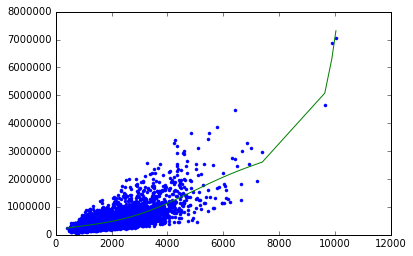

In [84]:
model3 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model3.fit(poly15_set3, set_3['price'])

plt.plot(poly15_set3['power_1'],set_3['price'],'.',
        poly15_set3['power_1'], model3.predict(poly15_set3),'-')

## Set 4

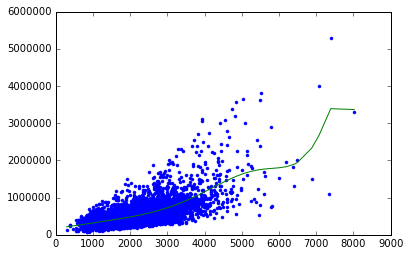

In [85]:
model4 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model4.fit(poly15_set4, set_4['price'])

plt.plot(poly15_set4['power_1'],set_4['price'],'.',
        poly15_set4['power_1'], model4.predict(poly15_set4),'-')

In [86]:
print(list(zip(poly15_set1.columns, model1.coef_)))
print(list(zip(poly15_set2.columns, model2.coef_)))
print(list(zip(poly15_set3.columns, model3.coef_)))
print(list(zip(poly15_set4.columns, model4.coef_)))

[('power_1', -15.210717830515822), ('power_2', 0.043226194385277819), ('power_3', 7.6130137922681501e-06), ('power_4', -1.0105250081291941e-09), ('power_5', -3.5983022931707333e-14), ('power_6', 2.8006740400790594e-18), ('power_7', 3.2959975430260168e-22), ('power_8', 1.6550016080802282e-26), ('power_9', 2.7776756051408599e-31), ('power_10', -3.5288668292397296e-35), ('power_11', -4.6537457175485571e-39), ('power_12', -3.4934356905009694e-43), ('power_13', -1.836157071393857e-47), ('power_14', -4.5618046544588252e-52), ('power_15', 4.5083434436953776e-56)]
[('power_1', 288.18511530135805), ('power_2', -0.10066666994350074), ('power_3', 1.9693739524282475e-05), ('power_4', 2.73446796363177e-09), ('power_5', -2.1512694734825017e-13), ('power_6', -5.5190201535423056e-17), ('power_7', -3.6756774509577045e-21), ('power_8', 8.9556351989179131e-26), ('power_9', 4.7055388910874292e-29), ('power_10', 5.9465759345774572e-33), ('power_11', 4.5720791144206734e-37), ('power_12', 1.5598032756598686e

In [87]:
l2_large_penalty=1.23e2

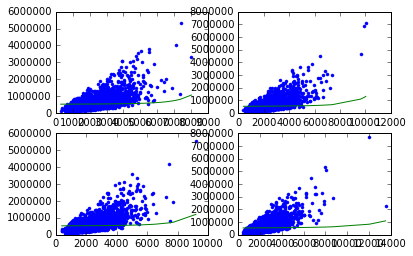

In [88]:
model1 = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model1.fit(poly15_set1, set_1['price'])
model2 = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model2.fit(poly15_set2, set_2['price'])
model3 = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model3.fit(poly15_set3, set_3['price'])
model4 = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model4.fit(poly15_set4, set_4['price'])

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.plot(poly15_set4['power_1'],set_4['price'],'.',
        poly15_set4['power_1'], model4.predict(poly15_set4),'-')
ax2 = fig.add_subplot(2,2,2)
ax2.plot(poly15_set3['power_1'],set_3['price'],'.',
        poly15_set3['power_1'], model3.predict(poly15_set3),'-')
ax3 = fig.add_subplot(2,2,3)
ax3.plot(poly15_set2['power_1'],set_2['price'],'.',
        poly15_set2['power_1'], model2.predict(poly15_set2),'-')
ax4 = fig.add_subplot(2,2,4)
ax4.plot(poly15_set1['power_1'],set_1['price'],'.',
        poly15_set1['power_1'], model1.predict(poly15_set1),'-')

plt.show()

In [89]:
print(list(zip(poly15_set1.columns, model1.coef_)))
print(list(zip(poly15_set2.columns, model2.coef_)))
print(list(zip(poly15_set3.columns, model3.coef_)))
print(list(zip(poly15_set4.columns, model4.coef_)))

[('power_1', 2.3280680295793239), ('power_2', 0.0003536216079418036), ('power_3', 3.3196969177032761e-08), ('power_4', 2.0008247692203758e-12), ('power_5', 1.1149255943638614e-16), ('power_6', 6.5778612248626597e-21), ('power_7', 4.1293952455053561e-25), ('power_8', 2.7039375516133925e-29), ('power_9', 1.8161476298896171e-33), ('power_10', 1.2382427677566472e-37), ('power_11', 8.5187248056261311e-42), ('power_12', 5.8945559766958335e-46), ('power_13', 4.0954255966511642e-50), ('power_14', 2.854648893049137e-54), ('power_15', 1.9954747560184629e-58)]
[('power_1', 2.0975690277785501), ('power_2', 0.00039081748325338914), ('power_3', 6.6718994435395206e-08), ('power_4', 8.9000299726023039e-12), ('power_5', 9.7263987682285815e-16), ('power_6', 9.6973368169440747e-20), ('power_7', 9.5056447509255391e-24), ('power_8', 9.4449103088382667e-28), ('power_9', 9.5719133847898104e-32), ('power_10', 9.8694515538489094e-36), ('power_11', 1.0310111516181025e-39), ('power_12', 1.0872978438817579e-43), 

## Selecting an L2 penalty via cross-validation

In [90]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv/wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('wk3_kc_house_test_data.csv/wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [91]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in xrange(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print i, (start, end)
    print len(train_valid_shuffled[0:start].append(train_valid_shuffled[end+1:n]))
    
for l2 in np.logspace(3, 9, num=13):
    

IndentationError: expected an indented block (<ipython-input-91-8605426f0e65>, line 11)

In [ ]:
def k_fold_cross_validation(k, l2_penalty, data, output):
    average_validation_error=0.0
    for i in xrange(k):
        start = (n*i)/k
        end = (n*(i+1))/k-1
        train = data[0:start].append(data[end+1:n])
        t_out = output[0:start].append(output[end+1:n])
        valid = data[start:end]
        v_out = output[start:end]
        model = linear_model.Ridge(alpha=l2_penalty, normalize=True)
        model.fit(train, t_out)
        v_out_pred = model.predict(valid)
        average_validation_error += ((v_out_pred- v_out)**2).sum()
    average_validation_error = average_validation_error/ k
    return average_validation_error

In [ ]:
shffld_data_15 = polynomial_frame(train_valid_shuffled['sqft_living'], 15)
out = train_valid_shuffled["price"]
k= 10
l2_penalty_mse = []
min_mse = None
best_l2_penalty = None
for l2 in np.logspace(3, 9, num=13):
    next_mse = k_fold_cross_validation(k, l2, shffld_data_15, out)
    l2_penalty_mse.append(next_mse)
    if min_mse is None or next_mse < min_mse:
            min_mse = next_mse
            best_l2_penalty = l2
    
print min_mse
print best_l2_penalty
print l2_penalty_mse


In [55]:
model = linear_model.Ridge(alpha=best_l2_penalty, normalize=True)
model.fit(shffld_data_15, out)
test_15 = polynomial_frame(test['sqft_living'], 15)
t_out = test["price"]
rss = ((t_out- model.predict(test_15))**2).sum()
print rss

2.83856861224e+14
